<h1><center>Reconhecimento de dígitos em imagens </center></h1>

# Treinamento em épocas e bacth

## Importação das bibliotecas

In [38]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


import matplotlib.pyplot as plt
import numpy as np

## Criação dos dicionários

In [39]:
args = {
    'batch_size': 200,
    'num_workers': 16,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 20
}

## Verificação do dispositivo

In [27]:
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')
print(args['device'])

cuda


## Importação do dataset de imagens

In [28]:
train_set = datasets.MNIST('./', train = True, download = True, transform = transforms.ToTensor())
test_set = datasets.MNIST('./', )

In [29]:
print(len(train_set))

60000


## Observação de dados

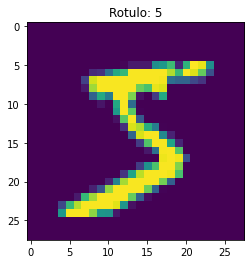

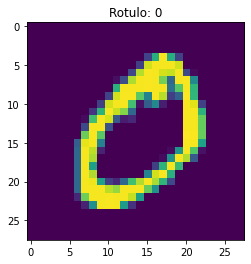

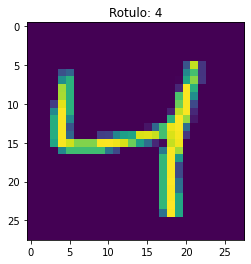

In [30]:
for i in range(3):
    dado, rotulo = train_set[i]
    plt.figure()
    plt.imshow(dado[0])
    plt.title('Rotulo: ' + str(rotulo))

## Utilizando o dataloader

In [31]:
train_loader = DataLoader(train_set, batch_size = args['batch_size'], shuffle = True, num_workers = args['num_workers'])
test_loader = DataLoader(test_set, batch_size = len(test_set), shuffle = True, num_workers = args['num_workers'])

## Como acessar o iterator

torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([2

torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([200, 1, 28, 28]) torch.Size([200])
torch.Size([2

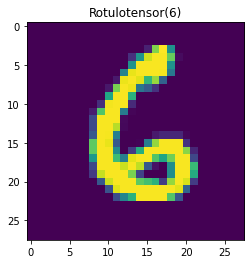

In [32]:
for batch in train_loader:
    dado, rotulo = batch
    print(dado.size(), rotulo.size())
    plt.imshow(dado[0][0])
    plt.title('Rotulo' + str(rotulo[0]))

## Fluxo de treinamento

### Criação da rede

In [33]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(MLP, self).__init__()
        
        self.features = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLu(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLu()
        )
        self.out = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, X):
        X = X.view(X.size(0), -1)
        feature = self.features(X)
        output = self.softmax(self.out(feature))
        return output

In [34]:
input_size = 28*28
hidden_size = 128
out_size = 10

In [40]:
print(torch.cuda.get_arch_list())

['sm_37', 'sm_50', 'sm_60', 'sm_61', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'compute_37']


In [41]:
net = MLP(input_size, hidden_size, out_size).to(args['device'])

AttributeError: module 'torch.nn' has no attribute 'ReLu'








### Definicao da loss e da perda

In [ ]:
criterion = nn.

### Realizando o fluxo de treinamento

In [ ]:
for epoch in range(args['num_epochs']):
    epoch_loss = [];
    
    for batch in train_loader:
        dado, rotulo = batch
        
        dado = dado.to(args['device'])
        rotulo = rotulo.to(args['device'])
        
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)
        
        loss.backward()
        optimizer.step()
    
    epoch_loss = np.asarray(epoch_loss)
    print(f"Epoca: {epoch}, Loss: {epoch_loss.mean():.2f}")

### Realizando testes de rede

In [ ]:
for dado, rotulo in test_loader:
    dados = dado
    rotulos = rotulo
predicoes = net(dados.to(args['device']))
predicoes = predicoes.to('cpu')
dados = dados.to('cpu')

In [ ]:
N = np.asarray(rotulos.data).shape[0]

acertos = 0
predicoes = np.asarray(predicoes.data)
rotulos = np.asarray(rotulos.data)

for i in range(np.asarray(rotulos.data).shape[0]):
    acertos += predicoes[i][rotulos[i]]

print(1-(N-round(acertos))/N)